# Recommender system

building the recommender system to power the recommendation page designed by the ui/ux designers

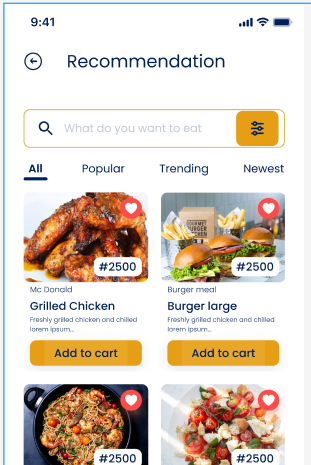

In [15]:
import pandas as pd


#Importing other files

import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000

pd.options.display.max_colwidth = 1_000

In [2]:
df = pd.read_csv('mock_data.csv', encoding='Latin-1')

## Popularity based recomender system

In [3]:
df.columns

Index(['User_id', 'Food_name', 'Food_categories', 'Food_price', 'Restaurant',
       'Rating', 'Review', 'Food_description', 'restaurant_location'],
      dtype='object')

In [4]:
popularity_data=df[['User_id','Food_name', 'Restaurant','Rating']]

In [5]:
#number of unique users
popularity_data['User_id'].nunique()

9000

In [6]:
#len of data
len(popularity_data)

100000

In [7]:
def Popularity_recommender(data):
    '''Return the 10 must popolar meals and their restaurant names'''
    return data.groupby(['Food_name','Restaurant'])['Food_name'].count().sort_values(ascending=False)[:10]

In [8]:
Popularity_recommender(popularity_data)

Food_name                                  Restaurant    
Fisherman's Soup with Eba                  Taste of Lagos    2019
Suya Platter (Beef, Chicken, and Innards)  Taste of Lagos    2012
Afang Soup with Fufu                       Taste of Lagos    2010
Peppered Snails                            Taste of Lagos    1992
Fried Rice with Beef Stir-Fry              Taste of Lagos    1991
Chicken Wings                              Taste of Lagos    1983
Okra Soup with Garri                       Taste of Lagos    1983
Grilled Fish with Plantain                 Taste of Lagos    1981
Prawn Stir-Fry with Rice                   Taste of Lagos    1969
Chocolate Cake                             Taste of Lagos    1968
Name: Food_name, dtype: int64

## Content based filtering

In [9]:
df.head()

,User_id,Food_name,Food_categories,Food_price,Restaurant,Rating,Review,Food_description,restaurant_location
0,5367,Spring Rolls,Starters and Appetizers,400,Naija Delights,3,Delicious food! Loved the flavors.,"('Spring Rolls are crispy pastry rolls filled with a mixture of vegetables, meat, or seafood. They are deep-fried until golden and are often served as appetizers or snacks.',)",Mainland
1,6583,Zobo (Hibiscus) Drink,Desserts and Beverages,500,Suya Palace,5,Great service and quality. Highly recommend.,"('Zobo Drink is a refreshing Nigerian beverage made from dried hibiscus petals, ginger, and other spices. It is usually sweetened with sugar or natural sweeteners and served chilled.',)",Mainland
2,5016,Ewa Agoyin with Agege Bread,Nigerian Delicacies,800,Naija Delights,3,Good portion size and value for money.,"('Ewa Agoyin is a spicy Nigerian bean stew made with cooked beans and a special sauce made from palm oil, onions, and peppers. It is typically served with Agege Bread, a soft and fluffy bread popular in Nigeria.',)",Mainland
3,2144,Fisherman's Soup with Eba,Seafood Delights,3200,Taste of Lagos,1,Food arrived late and order was incorrect.,"(""Fisherman's Soup is a spicy Nigerian soup made with a variety of seafood such as fish, prawns, and crabs. It is often enjoyed with Eba, a dough-like accompaniment made from cassava."",)",Island
4,3329,Puff Puff,Starters and Appetizers,300,Naija Delights,3,Delicious food! Loved the flavors.,"('Puff Puff is a popular Nigerian snack made from a simple batter of flour, sugar, yeast, and water. It is deep-fried until golden brown and has a fluffy, doughnut-like texture.',)",Mainland


In [10]:
import spacy

# losding in the language model pipeline from spacy
nlp = spacy.load("en_core_web_sm")

# Load libraries
import unicodedata
import sys


In [11]:
# cleaning the review and food_description column
def clean_column(data: pd.DataFrame, textcolumns:list[str]) -> None :
    '''
    - change to lower case
    - strip punctuations
    - remove stop words
    '''
    
    stopwords = nlp.Defaults.stop_words
    pat = r'\b(?:ive|im|{})\b'.format('|'.join(stopwords))
    
    # Create a dictionary of punctuation characters
    punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
    if unicodedata.category(chr(i)).startswith('P'))
    
    for col in textcolumns:
        data[col]=data[col].str.lower()
        data[col]=data[col].str.translate(punctuation)
        data[col]= data[col].str.replace(pat, '', regex=True)


In [13]:
clean_column(df,['Review','Food_description'])



In [14]:
df.to_csv('cleaned_data.csv')

In [17]:
food= df.drop_duplicates(['Food_name','Restaurant','Food_description'],ignore_index=True)
print(food.shape)
food.to_pickle('food_df.p')
food.head()

(87, 9)


,User_id,Food_name,Food_categories,Food_price,Restaurant,Rating,Review,Food_description,restaurant_location
0,5367,Spring Rolls,Starters and Appetizers,400,Naija Delights,3,delicious food loved flavors,spring rolls crispy pastry rolls filled mixture vegetables meat seafood deepfried golden served appetizers snacks,Mainland
1,6583,Zobo (Hibiscus) Drink,Desserts and Beverages,500,Suya Palace,5,great service quality highly recommend,zobo drink refreshing nigerian beverage dried hibiscus petals ginger spices usually sweetened sugar natural sweeteners served chilled,Mainland
2,5016,Ewa Agoyin with Agege Bread,Nigerian Delicacies,800,Naija Delights,3,good portion size value money,ewa agoyin spicy nigerian bean stew cooked beans special sauce palm oil onions peppers typically served agege bread soft fluffy bread popular nigeria,Mainland
3,2144,Fisherman's Soup with Eba,Seafood Delights,3200,Taste of Lagos,1,food arrived late order incorrect,fishermans soup spicy nigerian soup variety seafood fish prawns crabs enjoyed eba doughlike accompaniment cassava,Island
4,3329,Puff Puff,Starters and Appetizers,300,Naija Delights,3,delicious food loved flavors,puff puff popular nigerian snack simple batter flour sugar yeast water deepfried golden brown fluffy doughnutlike texture,Mainland


In [15]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature extraction and vectorization
vectorizer_desc = TfidfVectorizer(stop_words='english')
vectorizer_cat = TfidfVectorizer(stop_words='english')
vectorizer_loc = TfidfVectorizer(stop_words='english')
description_vectors = vectorizer_desc.fit_transform(food['Food_description'])
category_vectors = vectorizer_cat.fit_transform(food['Food_categories'])
location_vectors = vectorizer_loc.fit_transform(food['restaurant_location'])
price_normalized = (food['Food_price'] - food['Food_price'].min()) / (food['Food_price'].max() - food['Food_price'].min())


In [16]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
description_similarity = linear_kernel(description_vectors)
category_similarity = linear_kernel(category_vectors)
location_similarity = linear_kernel(location_vectors)

In [24]:
# Generate recommendations for a given user
def get_recommendations(user_id, top_n=5):
    # Filter data based on user_id
    user_orders = df[df['User_id'] == user_id]

    # Create a user profile by combining the descriptions of their previous orders
    user_profile_desc = ' '.join(user_orders['Food_description'])
    user_profile_cat = ' '.join(user_orders['Food_categories'])
    user_profile_loc = ' '.join(user_orders['restaurant_location'])
    
    # Vectorize the user profile
    user_profile_desc_vector = vectorizer_desc.transform([user_profile_desc])
    user_profile_cat_vector = vectorizer_cat.transform([user_profile_cat])
    user_profile_loc_vector = vectorizer_loc.transform([user_profile_loc])
  

    # Calculate the similarity between user profile and food items
    description_similarity_scores = linear_kernel(user_profile_desc_vector, description_vectors)[0]
    category_similarity_scores = linear_kernel(user_profile_cat_vector, category_vectors)[0]
    location_similarity_scores = linear_kernel(user_profile_loc_vector, location_vectors)[0]

    # Calculate the weighted average of similarities
    similarity_scores = (
        0.8 * description_similarity_scores
        + 0.1 * category_similarity_scores
        + 0.1 * location_similarity_scores
    )

    # Sort by similarity scores and get the top recommendations
    top_indices = similarity_scores.argsort()[::-1][:top_n]
    recommendations = food.loc[top_indices, ['Food_name','Restaurant']]

    return recommendations


In [25]:
user_id = 5367
recommended_items = get_recommendations(user_id)
print(f'Recommended items for user {user_id}:')
print(recommended_items)

Recommended items for user 5367:
                                Food_name        Restaurant
73                         Chocolate Cake    Taste of Lagos
0                            Spring Rolls    Naija Delights
58          Fried Rice with Beef Stir-Fry    Taste of Lagos
12  Grilled Beef Skewers with Spicy Sauce  Taste of Nigeria
57                         Nigerian Salad       Suya Palace


In [26]:
get_recommendations(6583)

,Food_name,Restaurant
69,BBQ Chicken Wings with French Fries,Taste of Nigeria
58,Fried Rice with Beef Stir-Fry,Taste of Lagos
82,Fried Rice with Beef Stir-Fry,Naija Delights
43,Fried Rice with Beef Stir-Fry,Taste of Nigeria
13,Barbecue Ribs with Coleslaw,Taste of Lagos


### Evaluating recommendations

In [ ]:
def evaluate_recommender(test_data, tfidf_category, tfidf_location, tfidf_description, food_category_features,
                         restaurant_location_features, food_description_features):
    user_ids = test_data['User_id'].unique()
    precision_scores = []
    recall_scores = []

    for user_id in user_ids:
        # Make recommendations for the user
        recommendations = get_recommendations(user_id)

        # Get the actual items that the user has interacted with
        actual_items = test_data[test_data['User_id'] == user_id][['Food_name', 'Restaurant']].values

        # Compute precision and recall scores
        precision = precision_score(actual_items, recommendations, average='micro')
        recall = recall_score(actual_items, recommendations, average='micro')

        precision_scores.append(precision)
        recall_scores.append(recall)

    # Compute average precision and recall scores
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)

    print("Average Precision Score: ", avg_precision)
    print("Average Recall Score: ", avg_recall)

# Train the recommender system on the training data
tfidf_category, tfidf_location, tfidf_description, food_category_features, restaurant_location_features, food_description_features = train_recommender(train_data)

# Evaluate the recommender system on the test data
evaluate_recommender(test_data, tfidf_category, tfidf_location, tfidf_description, food_category_features,
                     restaurant_location_features, food_description_features)